In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers.legacy import SGD, Adam, RMSprop, Adagrad
from sklearn.model_selection import KFold

2024-12-28 13:02:40.430035: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-28 13:02:40.553440: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-28 13:02:40.553513: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-28 13:02:40.567960: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-28 13:02:40.603251: I tensorflow/core/platform/cpu_feature_guar

In [3]:
# preprocessing
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [4]:
# parameters build
n_input = 784
n_hidden1 = 1024
n_hidden2 = 512
n_hidden3 = 512
n_hidden4 = 512
n_output = 10

batch_size = 256
n_epochs = 20
k = 5

In [5]:
# function to build model
def build_model():
    model = Sequential()
    model.add(Dense(units=n_hidden1, activation="relu", input_shape=(n_input,)))
    model.add(Dense(units=n_hidden2, activation="relu"))
    model.add(Dense(units=n_hidden3, activation="relu"))
    model.add(Dense(units=n_hidden4, activation="relu"))
    model.add(Dense(units=n_output, activation="softmax"))
    return model


def cross_validation(opt):
    accuracy = []
    for train_index, val_index in KFold(k).split(x_train):
        xtrain, xval = x_train[train_index], x_train[val_index]
        ytrain, yval = y_train[train_index], y_train[val_index]
        dmlp = build_model()
        dmlp.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
        dmlp.fit(xtrain, ytrain, batch_size=batch_size, epochs=n_epochs, verbose=0)
        accuracy.append(dmlp.evaluate(xval,yval,verbose=0)[1])
    return accuracy

In [6]:
acc_sgd = cross_validation(SGD())
acc_adagrad = cross_validation(Adagrad())
acc_rmsprop = cross_validation(RMSprop())
acc_adam = cross_validation(Adam())

2024-12-28 13:03:53.670808: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-12-28 13:03:53.758673: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-12-28 13:03:53.758937: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [7]:
print(f"acc of SGD: {np.array(acc_sgd).mean()}")
print(f"acc of Adagrad: {np.array(acc_adagrad).mean()}")
print(f"acc of RMSprop: {np.array(acc_rmsprop).mean()}")
print(f"acc of Adam: {np.array(acc_adam).mean()}")

acc of SGD: 0.8485833287239075
acc of Adagrad: 0.8317999839782715
acc of RMSprop: 0.887666666507721
acc of Adam: 0.8930333375930786


/tmp/ipykernel_5931/1421418871.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([acc_sgd, acc_adagrad, acc_rmsprop, acc_adam], labels=["SGD", "Adagrad", "RMSprop", "Adam"])


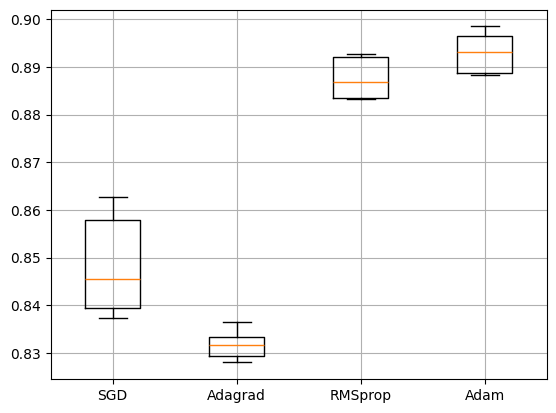

In [8]:
plt.boxplot([acc_sgd, acc_adagrad, acc_rmsprop, acc_adam], labels=["SGD", "Adagrad", "RMSprop", "Adam"])
plt.grid()
plt.show()